# Tasca 2-A. Estructura de una Matriz

Anem a practicar i a familiaritzar-nos amb l'estructure de Matrius, dimensio, forma, vectorització i Broadcasting .



In [1]:
# Carga de librería Numpy
import numpy as np

## Nivell 1
Treballem els conceptes de l'estructura d'una matriu, dimensió, eixos i la vectorització que ens permet reduir l'ús de for loops en

operacions aritmètiques o matemàtiques..

### Exercici 1
Crea un np.array de una dimension, que inclogui l'almenys 8 nombres sencers, data type int64. Mostra la dimensió i la forma de la matriu. .


In [2]:
mi_primer_array=np.arange(1,9)
print(mi_primer_array)
print('La dimensión de la matriz es: ',mi_primer_array.ndim)
print('La forma de la matriz es: ',mi_primer_array.shape)
print('Los números de la matriz son de tipo: ',mi_primer_array.dtype)

[1 2 3 4 5 6 7 8]
La dimensión de la matriz es:  1
La forma de la matriz es:  (8,)
Los números de la matriz son de tipo:  int32


In [3]:
mi_primer_array=mi_primer_array.astype('int64')
print('Los números de la matriz son de tipo: ',mi_primer_array.dtype)

Los números de la matriz son de tipo:  int64


In [4]:
mi_primer_array=mi_primer_array.reshape(1,-1)
mi_primer_array.shape

(1, 8)


### Exercici 2
De la matriu de l'exercici 1, calcula el valor mitjà dels valors introduïts i resta la mitjana resultant de cada un dels valors de la matriu.



In [5]:
media=mi_primer_array.mean()
media

4.5

In [6]:
mi_primer_array-media

array([[-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5]])

### Exercici 3
Crea una matriu bidimensional amb una forma de 5 x 5. Extreu el valor màxim de la matriu, i els valors màxims de cadascun dels seus eixos.


In [7]:
# Semilla
np.random.seed(123)

# Matriz con función aleatoria.
matriz_A=np.random.randint(100,size=(5,5))
matriz_A

array([[66, 92, 98, 17, 83],
       [57, 86, 97, 96, 47],
       [73, 32, 46, 96, 25],
       [83, 78, 36, 96, 80],
       [68, 49, 55, 67,  2]])

In [8]:
# Máximo matriz
np.max(matriz_A)

98

In [9]:
# Máximo columnas
np.max(matriz_A,axis=0)

array([83, 92, 98, 96, 83])

In [10]:
# Máximo filas
np.max(matriz_A,axis=1)

array([98, 97, 96, 96, 68])


## Nivell 2

Treballem els conceptes de l'estructura d'una matriu, Broadcasting, indexació, Mask..

### Exercici 4
Mostreu-me amb exemples de diferents matrius, la regla fonamental de Broadcasting que diu : "les matrius es poden transmetre / broadcast

entre si les seves dimensions coincideixen o si una de les matrius té una mida d'1".


_El término broadcasting hace referencia a como numpy trata arrays con diferentes formas durante operaciones aritméticas entre ellos. Cuando esto ocurre, lo que hace numpy es que transmite (broadcast en la documentación original) el array de menor  tamaño las veces necesarias para que tengan una forma compatible._ 

_En otras palabras, numpy redimensiona el array de menor tamaño repitiendo sus elementos el número de veces necesarias._

_Numpy comprar las dimensiones elemento a elemento empezando por la derecha. Dos dimensiones son compatibles cuando son iguales o cuando una de ellas es 1._

In [11]:
x = np.array([[1], [2], [3]])
y = np.array([1, 5, 6])


In [12]:
# Primer caso. 

x=np.array([1,2,3])
x.shape

(3,)

In [13]:
y=np.array([2])
y.shape

(1,)

In [14]:
# Como la dimensión de y es 1, numpy crea un array y_broadcast=[2,2,2] 
#repitiendo 3 veces su elemento para poder sumarlo a x
x+y

array([3, 4, 5])

In [15]:
a=np.ones(18).reshape(3,2,1,-1)
a.shape

(3, 2, 1, 3)

In [16]:
b=np.arange(18).reshape(3,2,3,-1)
b.shape

(3, 2, 3, 1)

_Cuando numpy intenta sumar estos dos arrays, va comparando las dimensiones de derecha a izquierda. Si son iguales o si una de ellas es igual a 1 son compatibles y lo que hace numpy es igualar esa dimensión al mayor valor._

_En este caso, de la suma de a + b resultará un array de dimensiones (3,2,3,3). Veámoslo._ 

In [17]:
a

array([[[[1., 1., 1.]],

        [[1., 1., 1.]]],


       [[[1., 1., 1.]],

        [[1., 1., 1.]]],


       [[[1., 1., 1.]],

        [[1., 1., 1.]]]])

In [18]:
b

array([[[[ 0],
         [ 1],
         [ 2]],

        [[ 3],
         [ 4],
         [ 5]]],


       [[[ 6],
         [ 7],
         [ 8]],

        [[ 9],
         [10],
         [11]]],


       [[[12],
         [13],
         [14]],

        [[15],
         [16],
         [17]]]])

In [19]:
c=a+b
c

array([[[[ 1.,  1.,  1.],
         [ 2.,  2.,  2.],
         [ 3.,  3.,  3.]],

        [[ 4.,  4.,  4.],
         [ 5.,  5.,  5.],
         [ 6.,  6.,  6.]]],


       [[[ 7.,  7.,  7.],
         [ 8.,  8.,  8.],
         [ 9.,  9.,  9.]],

        [[10., 10., 10.],
         [11., 11., 11.],
         [12., 12., 12.]]],


       [[[13., 13., 13.],
         [14., 14., 14.],
         [15., 15., 15.]],

        [[16., 16., 16.],
         [17., 17., 17.],
         [18., 18., 18.]]]])

In [20]:
c.shape

(3, 2, 3, 3)

_Si no se cumplen estas condiciones, numpy nos devolverá un error._

In [21]:
b=b.reshape(2,3,3,1)
a+b

ValueError: operands could not be broadcast together with shapes (3,2,1,3) (2,3,3,1) 


### Exercici 5
Utilitza la Indexació per extreure els valors d'una columna i una fila de la matriu. I suma els seus valors.



In [22]:
primera_fila=matriz_A[0,:]
primera_fila

array([66, 92, 98, 17, 83])

In [23]:
segunda_columna=matriz_A[:,1]
segunda_columna

array([92, 86, 32, 78, 49])

In [24]:
# Suma arrays
primera_fila+segunda_columna

array([158, 178, 130,  95, 132])

In [25]:
# Suma de todos los elementos
(primera_fila+segunda_columna).sum()

693

### Exercici 6
Mask la matriu anterior, realitzeu un càlcul booleà vectoritzat, agafant cada element i comprovant si es divideix uniformement per quatre.

Això retorna una matriu de mask de la mateixa forma amb els resultats elementals del càlcul.



In [26]:
# Importo el módulo de máscaras de numpy
import numpy.ma as ma

#Trabajaremos con la matriz_A
matriz_A

array([[66, 92, 98, 17, 83],
       [57, 86, 97, 96, 47],
       [73, 32, 46, 96, 25],
       [83, 78, 36, 96, 80],
       [68, 49, 55, 67,  2]])

In [27]:
# Genero la máscara con el método masked_equal
#máscara
ma.masked_equal(matriz_A%4,0).mask

array([[False,  True, False, False, False],
       [False, False, False,  True, False],
       [False,  True, False,  True, False],
       [False, False,  True,  True,  True],
       [ True, False, False, False, False]])

In [28]:
#resultado del módulo de 4
ma.masked_equal(matriz_A%4,0).data

array([[2, 0, 2, 1, 3],
       [1, 2, 1, 0, 3],
       [1, 0, 2, 0, 1],
       [3, 2, 0, 0, 0],
       [0, 1, 3, 3, 2]], dtype=int32)

In [29]:
# Genero la máscara con el método masked_where
z=ma.masked_where(matriz_A%4==0,matriz_A)
z.mask

array([[False,  True, False, False, False],
       [False, False, False,  True, False],
       [False,  True, False,  True, False],
       [False, False,  True,  True,  True],
       [ True, False, False, False, False]])

In [30]:
# O lo más sencillo, haciendo una operación booleana
mascara=matriz_A%4==0
mascara

array([[False,  True, False, False, False],
       [False, False, False,  True, False],
       [False,  True, False,  True, False],
       [False, False,  True,  True,  True],
       [ True, False, False, False, False]])

## Exercici 7
A continuació, utilitzeu aquesta màscara per indexar a la matriu de números original. Això fa que la matriu perdi la seva forma original,

reduint-la a una dimensió, però encara obteniu les dades que esteu cercant.



In [31]:
matriz_A[z.mask]

array([92, 96, 32, 96, 36, 96, 80, 68])

## Nivell 3
Manipulació d’imatges amb Matplotlib.

Carregareu qualsevol imatge (jpg, png ..) amb Matplotlib. adoneu-vos que les imatges RGB (Red, Green, Blue) són realment només amplades × alçades × 3 matrius (tres canals Vermell, Verd i Blau), una per cada color de nombres enters int8,

manipuleu aquests bytes i torneu a utilitzar Matplotlib per desar la imatge modificada un cop hàgiu acabat.

Ajuda:Importeu, import matplotlib.image as mpimg. estudieu el metodde mpimg.imread(()

### Exercici 8
Mostreu-me a veure que passa quan eliminem el canal G Verd o B Blau.

Mostreu-me a veure que passa quan eliminem el canal G Verd o B Blau. Hauries de utizar la indexacion per selecciones el canal que voleu anul·lar.

Utilitzar el mètode, mpimg.imsave () de la llibreria importada, per guardar les imatges modificades i que haureu de pujar al vostre repositori a github.

In [32]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [33]:
img=mpimg.imread('stinkbug.png')
print(img[:,:,:])
img.shape

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


(375, 500, 3)

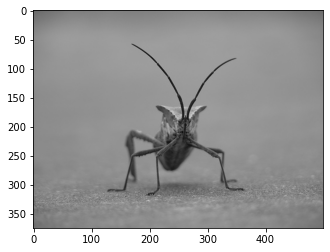

In [34]:
img_plot=plt.imshow(img)

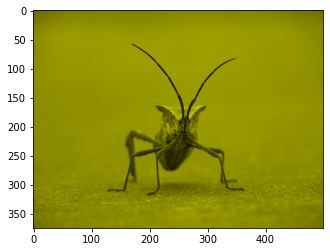

In [35]:
# Modifico el canal azul de la imagen
imagen_blue=img.copy()
imagen_blue[:,:,2]=0

# Cuando elimino el canal azul la imagen tiene que tener unos tonos mezclados de rojos y verdes
plt.imshow(imagen_blue)


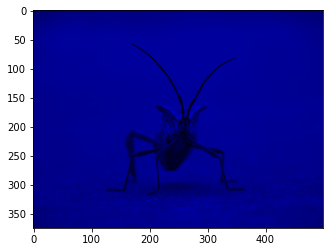

In [36]:
# Si lo que quiero es tener una imagen azul tendría que dejar a cero los canales rojo y verde.
imagen_blue=img.copy()
imagen_blue[:,:,0:2]=0
plt.imshow(imagen_blue)

# Guardo la imagen en formato png
mpimg.imsave('blue.png',imagen_blue,format='png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


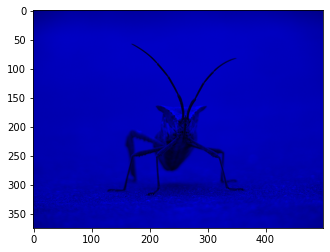

In [37]:
# Y si quiero aclarar la imagen modifico los valores del canal multiplicando por 1,25.
imagen_blue=imagen_blue*1.25
plt.imshow(imagen_blue)

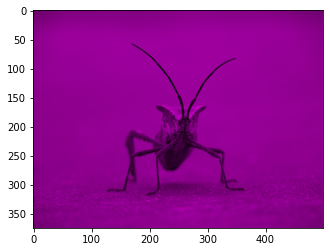

In [38]:
# Modifico el canal verde de la imagen
imagen_green=img.copy()
imagen_green[:,:,1]=0
# Cuando elimino el canal verde la imagen tiene que tener unos tonos mezclados de rojos y azules
plt.imshow(imagen_green)


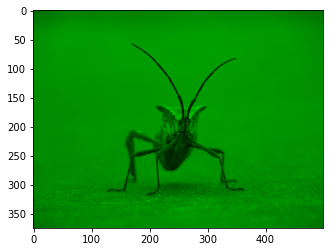

In [39]:
# Genero una imagen verdo dejando a cero los canales rojo y azul
imagen_green=img.copy()
imagen_green[:,:,[0,2]]=0
plt.imshow(imagen_green)

# Guardo el archivo
mpimg.imsave('green.png',imagen_green,format='png')


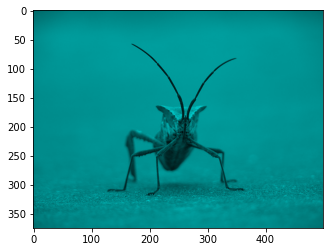

In [40]:
# Modifico el canal rojo de la imagen
imagen_red=img.copy()
imagen_red[:,:,0]=0

# Cuando elimino el canal verde la imagen tiene que tener unos tonos mezclados de verdes y azules
plt.imshow(imagen_red)

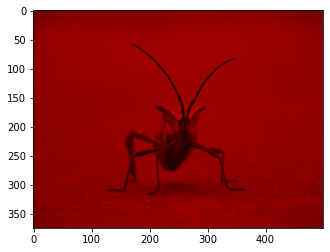

In [41]:
# Genero una imagen roja 
imagen_red=img.copy()
imagen_red[:,:,[1,2]]=0

# Cuando elimino el canal verde la imagen tiene que tener unos tonos mezclados de verdes y azules
plt.imshow(imagen_red)
mpimg.imsave('red.png',imagen_red,format='png')

En fotografía uno de los elementos que se utilizan para valorar la exposición de una imagen el es histograma. Con numpy y matplotlib podemos representar el histograma con las funciones ravel e hist.

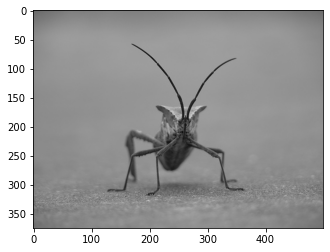

In [42]:
plt.imshow(img)

In [43]:
img_clara=img.copy()

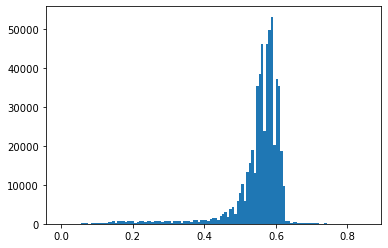

In [44]:
plt.hist(img_clara.ravel(),bins=125)
plt.show()

Podemos modificar la luminosidad aumentando o disminuyendo el valor de los elementos del array, teniendo en cuenta que matplotlib interpreta que estos valores están entre 0 (negro) y 1 (blanco).

(0.0, 1.0)

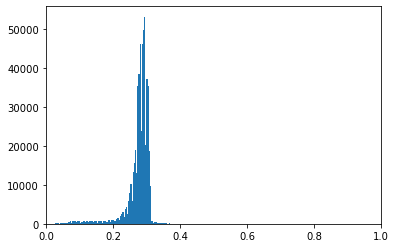

In [45]:
oscura=img_clara*0.5
plt.hist(oscura.ravel(),bins=125)
plt.xlim(0,1)
plt.show()

Text(0.5, 1.0, 'Oscura')

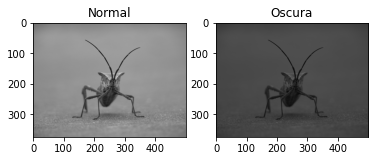

In [46]:
plt.subplot(1,2,1)
plt.imshow(img_clara)
plt.title('Normal')

plt.subplot(1,2,2)
plt.imshow(oscura)
plt.title('Oscura')
